In [14]:
import os
abspath = os.path.abspath('.')
dname = os.path.dirname(abspath)
os.chdir(dname)

In [15]:
from Lab1_Task3.unsupervised.SVD_np import SVD
from Lab1_Task3.unsupervised.PCA_np import PCA
from Lab1_Task3.unsupervised.TSNE_np import TSNE

In [16]:
# Importing the necessary Packages.
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from scipy.ndimage import interpolation as inter
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from future.utils import iteritems
import scipy.optimize as op 
import seaborn as sn

In [17]:
# Reading the dataset using Tensor Flow and keras.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = np.where((y_train == 0 ) | (y_train == 8))
test_filter = np.where((y_test == 0) | (y_test == 8))

X_train, Y_train = x_train[train_filter], y_train[train_filter]
X_test, Y_test = x_test[test_filter], y_test[test_filter]

In [18]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

### **SVD**

In [19]:
my_svd = SVD(n_components= 2)
my_svd.fit(X_train)
X_train_my_svd = my_svd.transform(X_train)
X_test_my_svd = my_svd.transform(X_test)

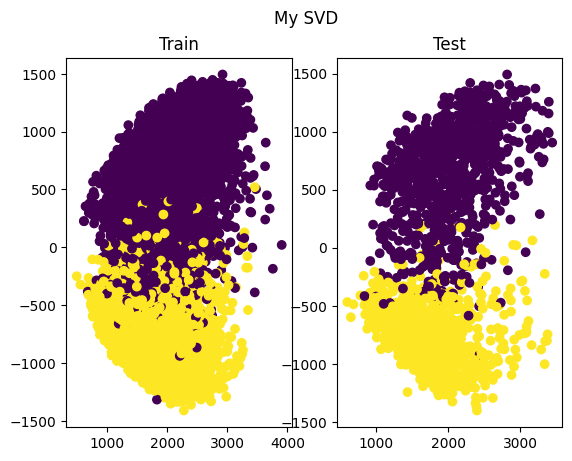

In [20]:
figure, (ax1, ax2) = plt.subplots(1,2)
figure.suptitle('My SVD')
ax1.scatter(X_train_my_svd[:,0],X_train_my_svd[:,1], c = Y_train)
ax1.set_title('Train')
ax2.scatter(X_test_my_svd[:,0],X_test_my_svd[:,1], c = Y_test)
ax2.set_title('Test')
plt.show()

In [21]:
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

clf.fit(X_train_my_svd, Y_train)
y_my_svd = clf.predict(X_test_my_svd)

print(classification_report(Y_test,y_my_svd))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       980
           8       0.95      0.97      0.96       974

    accuracy                           0.96      1954
   macro avg       0.96      0.96      0.96      1954
weighted avg       0.96      0.96      0.96      1954



### **PCA**

In [22]:
my_pca = PCA(n_components=2)
my_pca.fit(X_train)
X_train_my_pca = my_pca.transform(X_train)
X_test_my_pca = my_pca.transform(X_test)

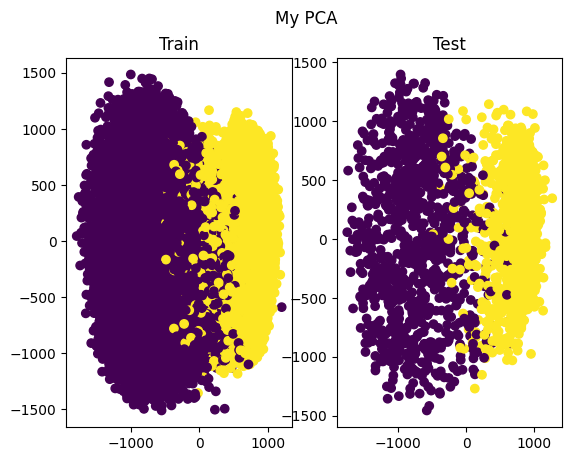

In [23]:
figure, (ax1, ax2) = plt.subplots(1,2)
figure.suptitle('My PCA')
ax1.scatter(X_train_my_pca[:,0],X_train_my_pca[:,1], c = Y_train)
ax1.set_title('Train')
ax2.scatter(X_test_my_pca[:,0],X_test_my_pca[:,1], c = Y_test)
ax2.set_title('Test')
plt.show()

In [24]:
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

clf.fit(X_train_my_pca, Y_train)
y_my_pca = clf.predict(X_test_my_pca)

print(classification_report(Y_test,y_my_pca))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       980
           8       0.92      0.97      0.95       974

    accuracy                           0.94      1954
   macro avg       0.95      0.94      0.94      1954
weighted avg       0.95      0.94      0.94      1954



### **TSNE**

In [ ]:
my_tsne = TSNE()
X_train_my_tsne = my_tsne.fit_transform(X_train,y_train)
X_test_my_tsne = my_tsne.fit_transform(X_test,y_train)

In [ ]:
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

clf.fit(X_train_my_tsne, Y_train)
y_my_tsne = clf.predict(X_test_my_tsne)

print(classification_report(Y_test,y_my_tsne))